<a href="https://colab.research.google.com/github/sheelaj123/Machine-Learning-Course--2024/blob/main/KNN_IN_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Building kNN model :) In Machine Learning

Step by step:


Getting to know the working of the algorithm ,

let us now implement it on a defaulter dataset (with 10000 data instances) while following the machine learning process outlined earlier.

#Step 1: Loading the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#reading in data from csv file
defaulter = pd.read_csv("defaulter.csv")

# Step 2: Feature engineering - normalization

Here you can normalize the balance and income columns in the data.


In [5]:
from sklearn.preprocessing import MinMaxScaler
#applying MinMaxScaler to the default dataset
scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(defaulter[features_to_scale])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]
defaulter.head()

,defaulter,student,balance,income,norm_balance,norm_income
0,No,No,729.526495,44361.62507,0.274845,0.598905
1,No,Yes,817.180407,12106.13470,0.307868,0.155727
2,No,No,1073.549164,31767.13895,0.404453,0.425862
3,No,No,529.250605,35704.49394,0.199392,0.479959
4,No,No,785.655883,38463.49588,0.295991,0.517867


# Step 3: Spliting the dataset into train and test data


In [6]:
from sklearn.model_selection import train_test_split
# selecting the predictors and target
X=defaulter[['norm_balance','norm_income']]
Y=defaulter['defaulter']
# splitting data into train and test data set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)


# Step 4: Building the model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
#kNN with k=3
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
model.fit(X_train,Y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

 # Step 5: Evaluate model performance on train and test sets


In [8]:
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)
#output
#0.977375 0.967


0.977375 0.967


In our example, value chosen for k is 3 while building the model. However, the choice of k affects the performance of the model. So, for the kNN algorithm, k is a hyperparameter that needs to be tuned.

The below code demonstrates the train and test accuracy for different values of k on the defaulter dataset:

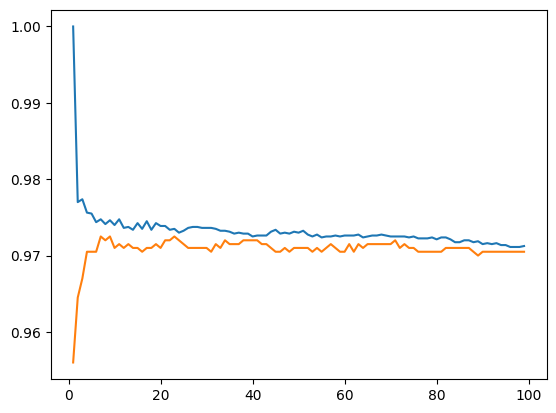

In [9]:
train_accuracies = []
test_accuracies = []
# building KNN model for values of k from 1 to 100
k_vals = [i for i in range(1,100)]
features = ["norm_balance","norm_income"]
target = "defaulter"
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(X_train,Y_train)
    train_accuracy_k = model.score(X_train,Y_train)
    test_accuracy_k = model.score(X_test,Y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)
plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)


#Topic ends here, Thanks for visiting ---happy learning <>